In [1]:
import sys
import os
import glob 
import copy
import json
from os import listdir
from pathlib import Path

# Working with arrays 
import numpy as np

# Working with Data Frames
import pandas as pd

# use afino library
#sys.path.append("/Users/veronicaestrada/Downloads/Kazachenko/scripts/afino_release_version")
#from qpp import afino

#additional libraries needed for AFINO
import scipy.optimize as opt 
import scipy.signal as sig

# additional libraries needed for AFINO
#sys.path.append("/Users/veronicaestrada/Downloads/Kazachenko/scripts/afino_release_version")
#from afino import afino_start
#from afino import afino_spectral_models

# import stats library 
import scipy.stats as stats 
from scipy.stats import gamma
from scipy.special import gammaincc, gammainccinv

# import the wavelet functions
sys.path.append("/Users/veronicaestrada/Downloads/Kazachenko_Lab/Project2/wavelets/wave_python")
import waveletFunctions as waveF


#This will be used to embed images in Jupyter Notebook

from IPython.display import Image
#While importing this is important to capitalize the I and P in IPython.
#if this is not done then this might be why there is an error


#Importing modules


import sys 
#this is used to manipulate variable and functions. 
#According to online resources this is helpful mostly for run time

import os
#This is useful when dealing with differnent directories in python.
##It can remove, change, or help accese directories

import glob
#This can be helpful when trying to return a file path that follows 
#a specific parttern

from os import listdir
#Shows a file or list of all files and directories that is in a working directory

from os import path
#I am not sure what this one does



#This is for arrays
import numpy as np

#For fit files and WCS objects
import astropy.units as u
from astropy.time import Time


#plotting and drawing modules

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


#additional libraroes needed for AFINO

from scipy.io import readsav as idlsave

#import stats librarry

import scipy.stats as stats


In [2]:
def recrate(flx, h): 
    '''compue the difference formula for f'(a) with step size h.
    
    parameters 
    -----------
    flx : array that contains reconnection flux 
    h : contant cadance between observationss
    
    Returns
    ---------
    recreate: reconnection flux(a+h) - reconnection flux(a-h)/2h 
            [negative reconnection rates, posative reconnection rate]
    '''
    
    recreate  = np.zeros((2, len(flx[1,:])))
    
    nflux       = flx[2]
    pflux      = flx[0]
    recreate[0] = np.gradient(nflux, h, edge_order = 2)
    recreate[1] = np.gradient(pflux, h, edge_order = 2) 
    
    return recreate


# Check if .sav file exists 
def check(filename,bstr,wvstr):
    '''
    
    inputs: 
            filename -- name of the reconnection flux idl save file
            bstr     -- 
                        BLOS - normal component taken as the line of sight
                        BRAD - normal component taken as the radial magnatic field (B_r)
            wvstr    -- 
    output: 
            savname  -- full filename with extension of the reconnection flux
    '''
    for i in range(len(bstr)): 
        if path.exists(filename+bstr[i]+wvstr+".sav" ) == True:
            return  filename+bstr[i]+wvstr+".sav"
        else: 
            print('File not found!')
            
            
def extract_ribbon_vars(idlstrct):
    '''
    Written by Marcel
    Oct. 5, 2020
    Inputs  --
    Outputs --  OPTIONAL (*) 
                *dosday --?
                flx6 -- magnetic reconnection flux for pixel area with I >= median(I)*6
                flx8 -- magnetic reconnection flux for pixel area with I >= median(I)*8
                flx10 -- magnetic reconnection flux for pixel area with I >= median(I)*10
                * area6 --?
                * area8 --? 
                * area10 --?
                * ar_area --? 
                * mflx --?
                tim -- UTC time from HMI 
                * cut --? 
                * sathr --? 
                * str_brad --? 
                * tim_maxnegrecrate --?    
                * tim_maxposrecrate --?       
                * maxnegrecrate --?        
                * maxposrecrate --?         
                n_o_satpix -- number of saturated points for a given AIA image          
                * bcenx6 --?               
                * bceny6 --?             
                * bcenx8 --?            
                * bceny8 --?            
                * bcenx10 --?             
                * bceny10 --?            
                * dst6 --?                
                * dst8 --?               
                * dst10 --?               

                
    
    Extract all the idl variables 
    '''
    
    flx6                = idlstrct.flx6 
    flx8                = idlstrct.flx8
    flx10               = idlstrct.flx10 
    tim                 = list(idlstrct.tim) #object arrays are not suported by python  
    n_o_satpix          = idlstrct.n_o_satpix
    # These have been commented out because they are not used in the qpp analysis 
    #dosday              = idlstrct.dosday
    area6               = idlstrct.area6 
    area8               = idlstrct.area8 
    area10              = idlstrct.area10 
    ar_area             = idlstrct.ar_area  
    #mflx                = idlstrct.mflx
    #cut                 = idlstrct.cut
    #satthr              = idlstrct.satthr
    #dflxdt              = idlstrct.dflxdt
    #str_brad            = idlstrct.str_brad

    #tim_maxnegrecrate   = idlstrct.tim_maxnegrecrate 
    #tim_maxposrecrate   = idlstrct.tim_maxposrecrate   
    #maxnegrecrate       = idlstrct.maxnegrecrate
    #maxposrecrate       = idlstrct.maxposrecrate 
    #bcenx6              = idlstrct.bcenx6
    #bceny6              = idlstrct.bceny6
    #bcenx8              = idlstrct.bcenx8
    #bceny8              = idlstrct.bceny8
    #bcenx10             = idlstrct.bcenx10
    #bceny10             = idlstrct.bceny10
    #dst6                = idlstrct.dst6
    #dst8                = idlstrct.dst8
    #dst10               = idlstrct.dst10
    
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,dflxdt,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
    return flx6,flx8,flx10,tim,n_o_satpix,area6,area8,area10,ar_area

def utc2jd(tim): 
    '''
    Written by Marcel 
    Oct. 2020
    
    Imput -- 
                tim -- UTC time from IDL sav file
    Output -- 
                jdt -- Julian days converted from UTC time  
                jst -- Julian days converted into seconds 
                js  -- Seconds from the start of the start date in Julian days
                to  -- Time Object dates in UTC-ISOT format
    '''
    jdt = list(np.zeros(len(tim)))
    jst = list(np.zeros(len(tim)))
    js  = list(np.zeros(len(tim)))
    sts = list(np.zeros(len(tim)))

    for i in range(len(tim)): 
        utcstr = str(tim[i])
        utcstr = utcstr.replace('b',"")
        utcstr = utcstr.replace("'",'') 
        sts[i] = utcstr #array to format date that is read by astropy
        jdt[i] = Time(utcstr,format='isot')
        jdt[i] = jdt[i].jd
        jst[i] = jdt[i] * 24 * 3600
        js[i]  = jst[i] - jst[0]
    jdt = np.array(jdt)
    jst = np.array(jst)
    js  = np.array(js)
    to  = Time(sts,scale='utc',format='isot') 
    return jdt,jst,js,to

def extract_RDB(flare_data):
    #extract all variables from RibbonDB IDL savefiles 
    rdbflx6,rdbflx8,rdbflx10,tim,n_o_satpix,area6,area8,area10,ar_area = extract_ribbon_vars(flare_data)
    rdbflx = (rdbflx6+rdbflx10)/2 # reconnection flux in Maxwells
   
    #changes from utc to julian calander (in seconds; see ribbon_functions.py)
    _,_,rdbt,rdbtt = utc2jd(tim) #time is stored in a time stamp from year, month, day, etc...
    
    # Evaluate the reconnection rate
    #   negative recflux = rflx[0,:]    
    #   positive recflux = rflx[1,:]
    rdbrflx  = recrate(rdbflx,rdbt[1]-rdbt[0]) # reconnection rate 
                                               # in units of Maxwells per second
    
    #conversion of time to minutes
    rdbt = rdbt/60
       
    return rdbflx,rdbrflx,rdbt,rdbtt,area8,n_o_satpix,ar_area


### Models ###  (possibly adapt into a function)
def power_law_model(a, f):
    return a[0] * f**a[1]

def colored_noise_model(a,f):
    return a[0] * f**a[1]  + a[2] 

def complex_noise_model(a,f): 
    
     return a[0] * f**a[1]  + a[2] +  a[3] * ( 1 + f**2/( a[4]*a[5]**2 ) )**( -(a[4]+1) / 2)
    
def power_law_decay_model(a, f):
    """
    Power Law + Constant Power + Power Law Decay Model
    Y = A_pl * f^a + A_cp + A_pd * f^(-a)
    log(Y) = log(A_pl * f^a + A_cp + A_pd * f^(-a))
    log(Y) = a * log(f) + log(A_pl + A_cp + A_pd * f^(-a))

    Parameters:
        frequencies: Frequency values [array]
        true_params: List containing model parameters[list]
              true_params[0]: Amplitude of power law
              true_params[1]: Power law index
              true_params[2]: Amplitude of constant power
              true_params[3]: Amplitude of power law decay
              true_params[4]: Decay frequency of power law decay

    Returns:
      Synthetic data following the power law + constant power + power law decay model[array]
    """
    return a[0] * f**a[1] + a[2] + a[3] / (1 + (f / a[4])**2)


def power_law_decay_gaussian_model(a, f):
    """
    Power Law + Constant Power + Power Law Decay + Gaussian Enhancement Model
    Y = A_pl * f^a + A_cp + A_pd * f^(-a) + A_g * exp(-(f - f_g)^2 / (2 * sigma_g^2))
    log(Y) = log(A_pl * f^a + A_cp + A_pd * f^(-a) + A_g * exp(-(f - f_g)^2 / (2 * sigma_g^2)))
    log(Y) = a * log(f) + log(A_pl + A_cp + A_pd * f^(-a) + A_g * exp(-(f - f_g)^2 / (2 * sigma_g^2)))


    Parameters:
        frequencies: Frequency values [array]
        true_params: List containing model parameters[list]
              true_params[0]: Amplitude of power law
              true_params[1]: Power law index
              true_params[2]: Amplitude of constant power
              true_params[3]: Amplitude of power law decay
              true_params[4]: Decay frequency of power law decay
              true_params[5]: Amplitude of Gaussian enhancement
              true_params[6]: Mean of Gaussian
              true_params[7]: Standard deviation of Gaussian

    Returns:
      Synthetic data following the power law + constant power + power law decay + Gaussian enhancement model [array]
      
      ( 1 + f**2/( a[4]*a[5]**2 ) )**( -(a[4]+1) / 2)
    """
    return a[0] * f**a[1] + a[2] + a[3] / (1 + (f / a[4])**2) + a[5] * np.exp(-(f - a[6])**2 / (2 * a[7]**2))


In [3]:
ext = "20131028_1132_11877_M1.4" #this is the data that I am working with

datadir ="/Users/veronicaestrada/Downloads/Kazachenko/"
rdbdir  = datadir+'files/'

sathr    = [5000.000,4500.000]
bstr     = ['{:.2f}'.format(sathr[0]) + r"_brad",'{:.2f}'.format(sathr[1]) + r"_brad"]
wvstr    = r""

# Automates the selection of variable bstr for each filename 
flarename   = check(rdbdir + "/recfile"+ext+r"_cut08_sat",bstr,wvstr) 
flare_data  = idlsave(flarename,verbose=0)

rdbflx,rdbrflx,rdbt,rdbtt,area8,n_o_satpix,ar_area = extract_RDB(flare_data)

rdbflx_n = rdbrflx[0]
rdbflx_p = rdbrflx[1]

### Make sure to try to use the previously made funtions in the likelihood notebook. ###


tmin = rdbt
flux = rdbflx_p


In [4]:
# def noise fitting function
def randomize_initial_guess(): 
    plaw_amp = np.random.random(1) * (-20) + 10 # power law amplitude [-20, 10]
    plaw_idx = np.random.random(1) * (-5) + 1   # power law index [-6, -1] 
    plaw_cts = np.random.random(1) * (-20) + 10 # power law constant [-20, 10]
    kapp_amp = np.random.random(1) * (-20) + 10 # kappa function amplitude [-20, 10]
    kapp_idx = np.random.random(1) * (-4) + 4   # kappa function index [-4,4] 
    kapp_rho = np.random.random(1) - 1          # kappa function frequency normilizer [-1,1]
    
    #[0.05, 1d-4, -2.0, 20, 10.0, 0.1] 
    initial_guess = [plaw_amp[0], plaw_idx[0], plaw_cts[0], kapp_amp[0], kapp_idx[0], kapp_rho[0]]

    return initial_guess
    


def lnlike(a, f, data, model_function):
    model = model_function(a, f)
    epsilon = 1e-10  # Small offset to avoid zeros
    return -np.sum(np.log(np.abs(model) + epsilon)) - np.sum(data / (np.abs(model) + epsilon))



def BIC(k, variables, f, power, model_function, n):
    '''
    input:
    
    k: This is the number of free parameters in your model. It penalizes models with more parameters.

    variables: The parameters of your model. These are the values that the model uses to fit the data.

    f: The frequencies of your data.

    power: The power spectrum of your data.

    model_function: The function that defines your model. It takes variables and f as inputs and returns the model predictions.

    n: The number of data points.

    output:

    -2 * lnlike(variables, f, power, model_function): This is a common factor in BIC calculations. The factor of 2 comes from the assumption of normally distributed errors.

    k * np.log(n): This is the penalty term for the number of parameters in the model. It penalizes more complex models. The np.log(n) term accounts for the sample size.

    The entire expression is returned as the BIC score.'''
    return -2 * lnlike(variables, f, power, model_function) + k * np.log(n)

def rhoj(Sj, shatj):
    """
    Sample to Model Ratio (SMR) estimator (Eq. 5)

    Parameters
    ----------

    Sj
        random variables (i.e. data)
    shatj
        best estimate of the model. Should be same length as Sj

    Returns
    -------
    ndarray
        The Sample-to-Model ratio
    """
    return Sj / shatj

def rchi2_calc(m, nu, rhoj):
    """
    Goodness-of-fit estimator (Eq. 16)

    Parameters
    ----------

    m    - number of spectra considered
    nu   - degrees of freedom
    rhoj - sample to model ratio estimator

    Returns
    -------
    float - A chi-square like goodness of fit estimator
    """
    return (m / (1.0 * nu)) * np.sum((1.0 - rhoj) ** 2)


def prob_this_rchi2_or_larger(rchi2, m, nu):
    """
    :param rchi2: reduced chi-squared value
    :param m: number of spectra considered
    :param nu:  degrees of freedom
    :return:
    """
    a = (nu / 2.0) * np.float64(m) / (3.0 + np.float64(m))
    return gammaincc(a, a * rchi2)

def noise_fitting(f,power,model='colored', noise_prams = None, include_sinusoid = False):
    
    #---------------------------------------
    #use fitting methods from scipy optimize
    best_lnlike = -999999.0
    #best_param_vals = -999999.0
    # --------------------------------------------------------
    if model == 'colored':

        #don't have a good idea of starting guess parameters so randomize these and do multiple trials to cover more parameter space
        for i in range(0,20):

            #get randomized initial guess params to input into fit
            guess = randomize_initial_guess()
            #guess = [0,-4,0]

            #try 3 different fitting algorithms to ensure we maximize the likelihood
            for method in ['L-BFGS-B','TNC','SLSQP']:
                x0     = [guess[0],guess[1],guess[2]]
                nll    = lambda *args: -lnlike(*args)
                args   = (f,power,colored_noise_model)
                #bounds = [(-1e20,1e20),(-10,-1),(-1e20,1e20)]
                 
                res         = opt.minimize(nll, x0, args=args, method=method)
                param_vals  = res['x']
                jack_lnlike = lnlike(param_vals,f,power,colored_noise_model)
            
                if jack_lnlike > best_lnlike:
                    best_lnlike     = copy.deepcopy(jack_lnlike)
                    best_param_vals = copy.deepcopy(param_vals)

        #calculate BIC and store best fit power spectrum and params
        jack_bic                = BIC(3,best_param_vals,f,power,colored_noise_model,len(power))
        best_fit_power_spectrum = colored_noise_model(best_param_vals,f)
        best_fit_params         = best_param_vals
        
    #-------------------------------------    
    if model == 'complex':

        #don't have a good idea of starting guess parameters so randomize these and do multiple trials to cover more parameter space
        for i in range(0,20):

            #get randomized initial guess params to input into fit
            guess = randomize_initial_guess()

            #try 3 different fitting algorithms to ensure we maximize the likelihood
            for method in ['L-BFGS-B','TNC','SLSQP']:
                x0   = guess
                nll  = lambda *args: -lnlike(*args)
                args = (f,power,complex_noise_model)
                
                res         = opt.minimize(nll, x0, args=args, method=method)
                param_vals  = res['x']
                jack_lnlike = lnlike(param_vals,f,power,colored_noise_model)
            
                if jack_lnlike > best_lnlike:
                    best_lnlike     = copy.deepcopy(jack_lnlike)
                    best_param_vals = copy.deepcopy(param_vals)

        #calculate BIC and store best fit power spectrum and params
        jack_bic                = BIC(6,best_param_vals,f,power,complex_noise_model,len(power))
        best_fit_power_spectrum = complex_noise_model(best_param_vals,f)
        best_fit_params         = best_param_vals
          
    #----------------------------------------
    
    #also want to find the goodness of fit for the best model
    smr = rhoj(power,best_fit_power_spectrum)
    if model == 'colored':
        deg_free = len(power) - 3
        rchi2    = rchi2_calc(1, deg_free, smr)
        prob     = prob_this_rchi2_or_larger(rchi2, 1, deg_free)
    elif model == 'complex':
        deg_free = len(power) - 6
        rchi2    = rchi2_calc(1, deg_free, smr)
        prob     = prob_this_rchi2_or_larger(rchi2, 1, deg_free)
    
    #----------------------------------------
    
    #now have the best fit, likelihood and BIC value. Return all these in a dictionary
    #will save combined fit results (both models) to a pickle file in the next level up.
    fitresults = {}
    fitresults['lnlike']                  = best_lnlike #likelihoods[selection_index]
    fitresults['model']                   = model
    fitresults['BIC']                     = jack_bic
    fitresults['best_fit_power_spectrum'] = best_fit_power_spectrum
    fitresults['frequencies']             = f
    fitresults['power']                   = power
    fitresults['params']                  = best_fit_params
    fitresults['rchi2']                   = rchi2
    fitresults['probability']             = prob
    
    return fitresults
            


## Wavelet Analysis Function

In [5]:
def WaveletAnalysis(Time, Flux, save_path=None):
    # Validate input parameters
    if len(Time) != len(Flux):
        raise ValueError("Input arrays 'Time' and 'Flux' must have the same length.")
    
    dt = Time[1] - Time[0]
    pad = 1
    dj = 1/8
    s0 = 2*dt
    j1 = -1
    mother = 'MORLET'
    N = len(Time)
    siglvl = 0.95
    k0 = 6

    norm_flux = (Flux - np.mean(Flux)) / np.sqrt(np.var(np.abs(Flux)))

    Wcoef, Wperiod, Wscale, Wcoi = waveF.wavelet(norm_flux, dt, pad, dj, s0, j1, mother)
    Wpower = (np.abs(Wcoef)) ** 2
    Wpower_tave = (np.sum(Wpower, axis=1) / N)

    noise_fit = noise_fitting((1/Wperiod), Wpower_tave, model='colored')
    global_ws = (colored_noise_model(noise_fit['params'], (1/Wperiod)))
    global_ws_tave = (colored_noise_model(noise_fit['params'], (1/Wperiod)))

    local_powerlaw_signif = waveF.wave_signif(norm_flux, dt, Wscale, sigtest=0, siglvl=siglvl, gws=global_ws)
    local_powerlaw_signif = local_powerlaw_signif[:, np.newaxis].dot(np.ones(N)[np.newaxis, :])
    local_powerlaw_signif = Wpower / local_powerlaw_signif

    tave_dof = N - Wscale/dt
    tave_local_powerlaw_signif = waveF.wave_signif(norm_flux, dt, Wscale, sigtest=1, siglvl=siglvl, dof=tave_dof, gws=global_ws)

    localW_pwr = Wpower_tave - tave_local_powerlaw_signif

    Wpks = sig.find_peaks(Wpower_tave[Wperiod < Wcoi.max()], height=0.1)[0]
    Wpks = np.append(Wpks, sig.find_peaks(localW_pwr[Wperiod < Wcoi.max()], height=0.1)[0])

    if len(Wpks) > 0:
        locWi = np.argmin(np.abs(localW_pwr - np.max(localW_pwr[Wpks])))
    else:
        locWi = np.argmin(np.abs(localW_pwr - np.max(localW_pwr)))

    period_localW = Wperiod[locWi]
    Wimax = np.argmin(np.abs(Wperiod - period_localW))
    period_localW_flag = 0

    if localW_pwr[locWi] > 0:
        period_localW_flag = 1

    # Graphing components
    if save_path:
        axd = plt.figure(figsize=(15, 15), constrained_layout=True).subplot_mosaic(
            """
            AAA.
            BBBC
            BBBC
            BBBC
            """)

        fsize = 32
        bwth = 10

        sub1 = axd['A']
        sub2 = axd['B']
        sub3 = axd['C']

        # Time series
        sub1.plot(Time, norm_flux, marker='D', color='black', linestyle='dashed', mfc='blue', label='Time Series')
        sub1.set_title('Time Series', fontsize=30)
        sub1.set_ylabel('Flux', fontsize=25)
        sub1.set_xlabel('Time', fontsize=25)

        # Wavelet power spectrum
        CS = sub2.pcolormesh(Time, Wperiod, Wpower, cmap='Blues', vmin=0, vmax=2)
        sub2.plot(Time, Wcoi, 'r')
        sub2.set_xlabel('Time', fontsize=25)
        sub2.set_ylabel('Period', fontsize=25)
        sub2.set_title('Wavelet Power Spectrum', fontsize=30)
        sub2.fill_between(Time, Wcoi * 0 + Wperiod[-1], Wcoi, facecolor="none", edgecolor="#00000040", hatch='x')
        sub2.contour(tmin, Wperiod, local_powerlaw_signif,levels = [0.25, 0.5, 0.75, 1, 1.25, 1.50], vmin=0, vmax=2, cmap = 'Reds', linewidths= 2, zorder=3)
        sub2.set_ylim((0, 4))
        cbar = plt.colorbar(CS, location='bottom', ax=sub2)
        cbar.set_label('Power ($\sigma^2$)', labelpad=10, fontsize=25)

        # Add the interpolated significance levels to the second subplot
        sub3.plot(tave_local_powerlaw_signif, Wperiod, 'k--', label='Significance Level')

        # Average wavelet power spectrum
        sub3.plot(Wpower_tave, Wperiod, marker='D', color='blue', linestyle='solid', mfc='blue', label='Average Wavelet Power')
        sub3.axhline(y=period_localW, xmin=0, xmax=1, color='k', linestyle='dashed', label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub3.set_ylim((1, 4))
        sub3.set_xlim((0, 5))
        sub3.set_title('Avg. Wavelet Power', fontsize=30)
        sub3.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        sub3.set_ylabel('Period', fontsize=25)
        legend = sub3.legend(fontsize=13, loc='lower right', bbox_to_anchor=(1.0, 0.0))

        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
    else:
        axd = plt.figure(figsize=(15, 15), constrained_layout=True).subplot_mosaic(
            """
            AAA.
            BBBC
            BBBC
            BBBC
            """)

        fsize = 32
        bwth = 10

        sub1 = axd['A']
        sub2 = axd['B']
        sub3 = axd['C']

        # Time series
        sub1.plot(tmin, norm_flux, marker='D', color='black', linestyle='dashed', mfc='blue', label='Time Series')
        sub1.set_title('Time Series', fontsize=30)
        sub1.set_ylabel('Flux ', fontsize=25)
        sub1.set_xlabel('Time', fontsize=25)

        # Wavelet power spectrum
        CS = sub2.pcolormesh(tmin, Wperiod, Wpower, cmap='Blues', vmin=0, vmax=2)
        sub2.plot(tmin, Wcoi, 'r')  # cone of influence (The area's the signal is most reliable)
        sub2.set_xlabel('Time', fontsize=25)
        sub2.set_ylabel('Period', fontsize=25)
        sub2.set_title('Wavelet Power Spectrum', fontsize=30)
        sub2.fill_between(tmin, Wcoi * 0 + Wperiod[-1], Wcoi, facecolor="none",
                  edgecolor="#00000040", hatch='x')
        sub2.contour(tmin, Wperiod, local_powerlaw_signif,levels = [0.25, 0.5, 0.75, 1, 1.25, 1.50], vmin=0, vmax=2, cmap = 'Reds', linewidths= 2, zorder=3)

        sub2.set_ylim((0, 4))
        cbar = plt.colorbar(CS, location='bottom', ax=sub2)  # Pass ax=sub2
        cbar.set_label('Power ($\sigma^2$)', labelpad=10, fontsize=25)


        # Add the interpolated significance levels to the second subplot
        sub3.plot(tave_local_powerlaw_signif, Wperiod, 'k--', label='Significance Level')

        # Average wavelet power spectrum
        sub3.plot(Wpower_tave, Wperiod, marker='D', color='blue', linestyle='solid', mfc='blue', label='Average Wavelet Power')
        sub3.axhline(y = period_localW, xmin=0, xmax=1, color='k', linestyle='dashed',
             label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub3.set_ylim((1, 4))
        sub3.set_xlim((0, 5))
        sub3.set_title('Avg. Wavelet Power', fontsize=30)
        sub3.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        sub3.set_ylabel('Period', fontsize=25)
        legend = sub3.legend(fontsize=13, loc='lower right', bbox_to_anchor=(1.0, 0.0))

        plt.show()
    result = {
        'period_localW_flag': period_localW_flag,
        'Wperiod': Wperiod,
        'Wpower': Wpower,
        'Wcoi': Wcoi,
        'local_powerlaw_signif': local_powerlaw_signif,
        'Wpower_tave': Wpower_tave,
        'period_localW': period_localW
     }
    return result


    return period_localW_flag, Wperiod, Wpower, Wcoi, local_powerlaw_signif, Wpower_tave, period_localW

## Wavelet Analysis with 2D Plot

In [6]:
def WaveletAnalysis2D(Time, Flux, save_path=None):
    # Validate input parameters
    if len(Time) != len(Flux):
        raise ValueError("Input arrays 'Time' and 'Flux' must have the same length.")

    dt = Time[1] - Time[0]
    pad = 1
    dj = 1/8
    s0 = 2*dt
    j1 = -1
    mother = 'MORLET'
    N = len(Time)
    siglvl = 0.95
    k0 = 6

    norm_flux = (Flux - np.mean(Flux)) / np.sqrt(np.var(np.abs(Flux)))

    Wcoef, Wperiod, Wscale, Wcoi = waveF.wavelet(norm_flux, dt, pad, dj, s0, j1, mother)
    Wpower = (np.abs(Wcoef)) ** 2
    Wpower_tave = (np.sum(Wpower, axis=1) / N)

    noise_fit = noise_fitting((1/Wperiod), Wpower_tave, model='colored')
    global_ws = (colored_noise_model(noise_fit['params'], (1/Wperiod)))
    global_ws_tave = (colored_noise_model(noise_fit['params'], (1/Wperiod)))

    local_powerlaw_signif = waveF.wave_signif(norm_flux, dt, Wscale, sigtest=0, siglvl=siglvl, gws=global_ws)
    local_powerlaw_signif = local_powerlaw_signif[:, np.newaxis].dot(np.ones(N)[np.newaxis, :])
    local_powerlaw_signif = Wpower / local_powerlaw_signif

    tave_dof = N - Wscale/dt
    tave_local_powerlaw_signif = waveF.wave_signif(norm_flux, dt, Wscale, sigtest=1, siglvl=siglvl, dof=tave_dof, gws=global_ws)

    localW_pwr = Wpower_tave - tave_local_powerlaw_signif

    Wpks = sig.find_peaks(Wpower_tave[Wperiod < Wcoi.max()], height=0.1)[0]
    Wpks = np.append(Wpks, sig.find_peaks(localW_pwr[Wperiod < Wcoi.max()], height=0.1)[0])

    if len(Wpks) > 0:
        locWi = np.argmin(np.abs(localW_pwr - np.max(localW_pwr[Wpks])))
    else:
        locWi = np.argmin(np.abs(localW_pwr - np.max(localW_pwr)))

    period_localW = Wperiod[locWi]
    Wimax = np.argmin(np.abs(Wperiod - period_localW))
    period_localW_flag = 0

    if localW_pwr[locWi] > 0:
        period_localW_flag = 1

    # Graphing components
    if save_path:
        axd = plt.figure(figsize=(20, 30), constrained_layout=True).subplot_mosaic(
             """
            AAA.
            BBBC
            BBBC
            BBBC
            DDDD
            """)

        fsize = 32
        bwth = 10

        sub1 = axd['A']
        sub2 = axd['B']
        sub3 = axd['C']
        sub4 = axd['D']

        # Time series
        sub1.plot(tmin, norm_flux, marker='D', color='black', linestyle='dashed', mfc='blue', label='Time Series')
        sub1.set_title('Time Series', fontsize=30)
        sub1.set_ylabel('Flux ', fontsize=25)
        sub1.set_xlabel('Time', fontsize=25)

        # Wavelet power spectrum
        CS = sub2.pcolormesh(tmin, Wperiod, Wpower, cmap='Blues', vmin=0, vmax=2)
        sub2.plot(tmin, Wcoi, 'r')  # cone of influence (The area's the signal is most reliable)
        sub2.set_xlabel('Time', fontsize=25)
        sub2.set_ylabel('Period', fontsize=25)
        sub2.set_title('Wavelet Power Spectrum', fontsize=30)
        sub2.fill_between(tmin, Wcoi * 0 + Wperiod[-1], Wcoi, facecolor="none",
                  edgecolor="#00000040", hatch='x')
        sub2.contour(tmin, Wperiod, local_powerlaw_signif,levels = [0.25, 0.5, 0.75, 1, 1.25, 1.50], vmin=0, vmax=2, cmap = 'Reds', linewidths= 2, zorder=3)

        sub2.set_ylim((0, 4))
        cbar = plt.colorbar(CS, location='bottom', ax=sub2)  # Pass ax=sub2
        cbar.set_label('Power ($\sigma^2$)', labelpad=10, fontsize=25)

        # Add the interpolated significance levels to the second subplot
        sub3.plot(tave_local_powerlaw_signif, Wperiod, 'k--', label='Significance Level')

        # Average wavelet power spectrum
        sub3.plot(Wpower_tave, Wperiod, marker='D', color='blue', linestyle='solid', mfc='blue', label='Average Wavelet Power')
        sub3.axhline(y= period_localW, xmin=0, xmax=1, color='k', linestyle='dashed',
                     label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub3.set_ylim((1, 4))
        sub3.set_xlim((0, 5))
        sub3.set_title('Avg. Wavelet Power', fontsize=30)
        sub3.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        sub3.set_ylabel('Period', fontsize=25)
        legend = sub3.legend(fontsize=13, loc='lower right', bbox_to_anchor=(1.0, 0.0))

        # 2D Analysis
        sub4 = axd['D']
        sub4.plot(Wpower, color='green', linestyle='solid', label='2D Analysis')
        sub4.axhline(y = period_localW, xmin=0, xmax=1, color='k', linestyle='dashed',
             label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub4.set_title('2D Analysis', fontsize=30)
        sub4.set_ylabel('Period', fontsize=25)
        sub4.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        #legend2d = sub4.legend(fontsize=13, loc='upper right')

        plt.show()

    else:
        axd = plt.figure(figsize=(20, 30), constrained_layout=True).subplot_mosaic(
             """
            AAA.
            BBBC
            BBBC
            BBBC
            DDDD
            """)

        fsize = 32
        bwth = 10

        sub1 = axd['A']
        sub2 = axd['B']
        sub3 = axd['C']
        sub4 = axd['D']

        # Time series
        sub1.plot(tmin, norm_flux, marker='D', color='black', linestyle='dashed', mfc='blue', label='Time Series')
        sub1.set_title('Time Series', fontsize=30)
        sub1.set_ylabel('Flux ', fontsize=25)
        sub1.set_xlabel('Time', fontsize=25)

        # Wavelet power spectrum
        CS = sub2.pcolormesh(tmin, Wperiod, Wpower, cmap='Blues', vmin=0, vmax=2)
        sub2.plot(tmin, Wcoi, 'r')  # cone of influence (The area's the signal is most reliable)
        sub2.set_xlabel('Time', fontsize=25)
        sub2.set_ylabel('Period', fontsize=25)
        sub2.set_title('Wavelet Power Spectrum', fontsize=30)
        sub2.fill_between(tmin, Wcoi * 0 + Wperiod[-1], Wcoi, facecolor="none",
                  edgecolor="#00000040", hatch='x')
        sub2.contour(tmin, Wperiod, local_powerlaw_signif,levels = [0.25, 0.5, 0.75, 1, 1.25, 1.50], vmin=0, vmax=2, cmap = 'Reds', linewidths= 2, zorder=3)

        sub2.set_ylim((0, 4))
        cbar = plt.colorbar(CS, location='bottom', ax=sub2)  # Pass ax=sub2
        cbar.set_label('Power ($\sigma^2$)', labelpad=10, fontsize=25)

        # Add the interpolated significance levels to the second subplot
        sub3.plot(tave_local_powerlaw_signif, Wperiod, 'k--', label='Significance Level')

        # Average wavelet power spectrum
        sub3.plot(Wpower_tave, Wperiod, marker='D', color='blue', linestyle='solid', mfc='blue', label='Average Wavelet Power')
        sub3.axhline(y= period_localW, xmin=0, xmax=1, color='k', linestyle='dashed',
                     label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub3.set_ylim((1, 4))
        sub3.set_xlim((0, 5))
        sub3.set_title('Avg. Wavelet Power', fontsize=30)
        sub3.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        sub3.set_ylabel('Period', fontsize=25)
        legend = sub3.legend(fontsize=13, loc='lower right', bbox_to_anchor=(1.0, 0.0))

        # 2D Analysis
        sub4 = axd['D']
        sub4.plot(Wpower, color='green', linestyle='solid', label='2D Analysis')
        sub4.axhline(y = period_localW, xmin=0, xmax=1, color='k', linestyle='dashed',
             label='$\mathcal{P} =$' + "{:10.3f}".format(period_localW))
        sub4.set_title('2D Analysis', fontsize=30)
        sub4.set_ylabel('Period', fontsize=25)
        sub4.set_xlabel('Power ($\sigma^2$)', fontsize=25)
        #legend2d = sub4.legend(fontsize=13, loc='upper right')

        plt.show()
    
    result = {
        'period_localW_flag': period_localW_flag,
        'Waveletperiod': Wperiod,
        'Waveletpower': Wpower,
        'Waveletcoi': Wcoi,
        'local_powerlaw_signif': local_powerlaw_signif,
        'WaveletPower_tavg': Wpower_tave,
        'period_localWavelet': period_localW,
        'localWavelet_power': localW_pwr}
    return result


## Test of the Wavelet Analysis Function

/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_24512/1028808442.py:177: RuntimeWarning: overflow encountered in power
  return a[0] * f**a[1]  + a[2]
/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_24512/1028808442.py:177: RuntimeWarning: overflow encountered in multiply
  return a[0] * f**a[1]  + a[2]
/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_24512/1141735805.py:130: UserWarning: No contour levels were found within the data range.
  sub2.contour(tmin, Wperiod, local_powerlaw_signif,levels = [0.25, 0.5, 0.75, 1, 1.25, 1.50], vmin=0, vmax=2, cmap = 'Reds', linewidths= 2, zorder=3)


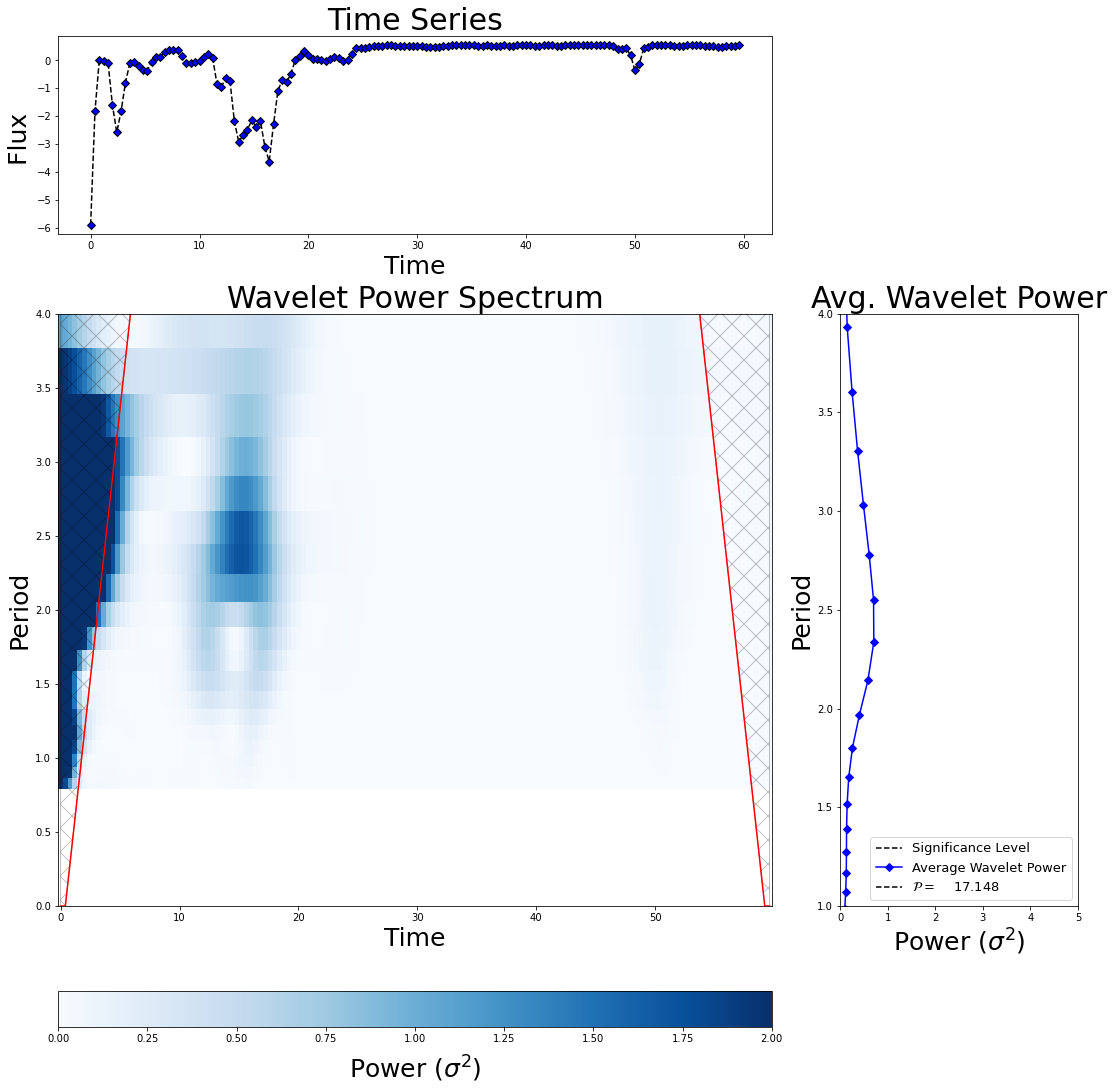

In [7]:
results = WaveletAnalysis(tmin, flux, save_path=None)

In [8]:
print(results)

{'period_localW_flag': 1, 'Wperiod': array([ 0.82643387,  0.90123252,  0.98280104,  1.07175213,  1.16875398,
        1.27453526,  1.38989055,  1.5156864 ,  1.65286773,  1.80246505,
        1.96560207,  2.14350426,  2.33750797,  2.54907051,  2.77978111,
        3.03137279,  3.30573547,  3.60493009,  3.93120414,  4.28700851,
        4.67501593,  5.09814103,  5.55956221,  6.06274558,  6.61147094,
        7.20986018,  7.86240828,  8.57401703,  9.35003187, 10.19628205,
       11.11912442, 12.12549116, 13.22294188, 14.41972037, 15.72481656,
       17.14803406, 18.70006374, 20.39256411, 22.23824885, 24.25098233,
       26.44588375, 28.83944073, 31.44963312, 34.29606811, 37.40012747,
       40.78512821, 44.4764977 , 48.50196466, 52.89176751, 57.67888146]), 'Wpower': array([[2.10874588e+00, 1.78332684e+00, 1.18354112e+00, ...,
        6.34706135e-03, 1.02730066e-02, 1.30343598e-02],
       [3.54528007e+00, 2.99920138e+00, 1.94865369e+00, ...,
        7.09519731e-03, 1.33794292e-02, 1.80066806e-

### Wavelet with 2D test

/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_24512/1028808442.py:177: RuntimeWarning: overflow encountered in power
  return a[0] * f**a[1]  + a[2]
/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_24512/1028808442.py:177: RuntimeWarning: overflow encountered in multiply
  return a[0] * f**a[1]  + a[2]
/Users/veronicaestrada/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


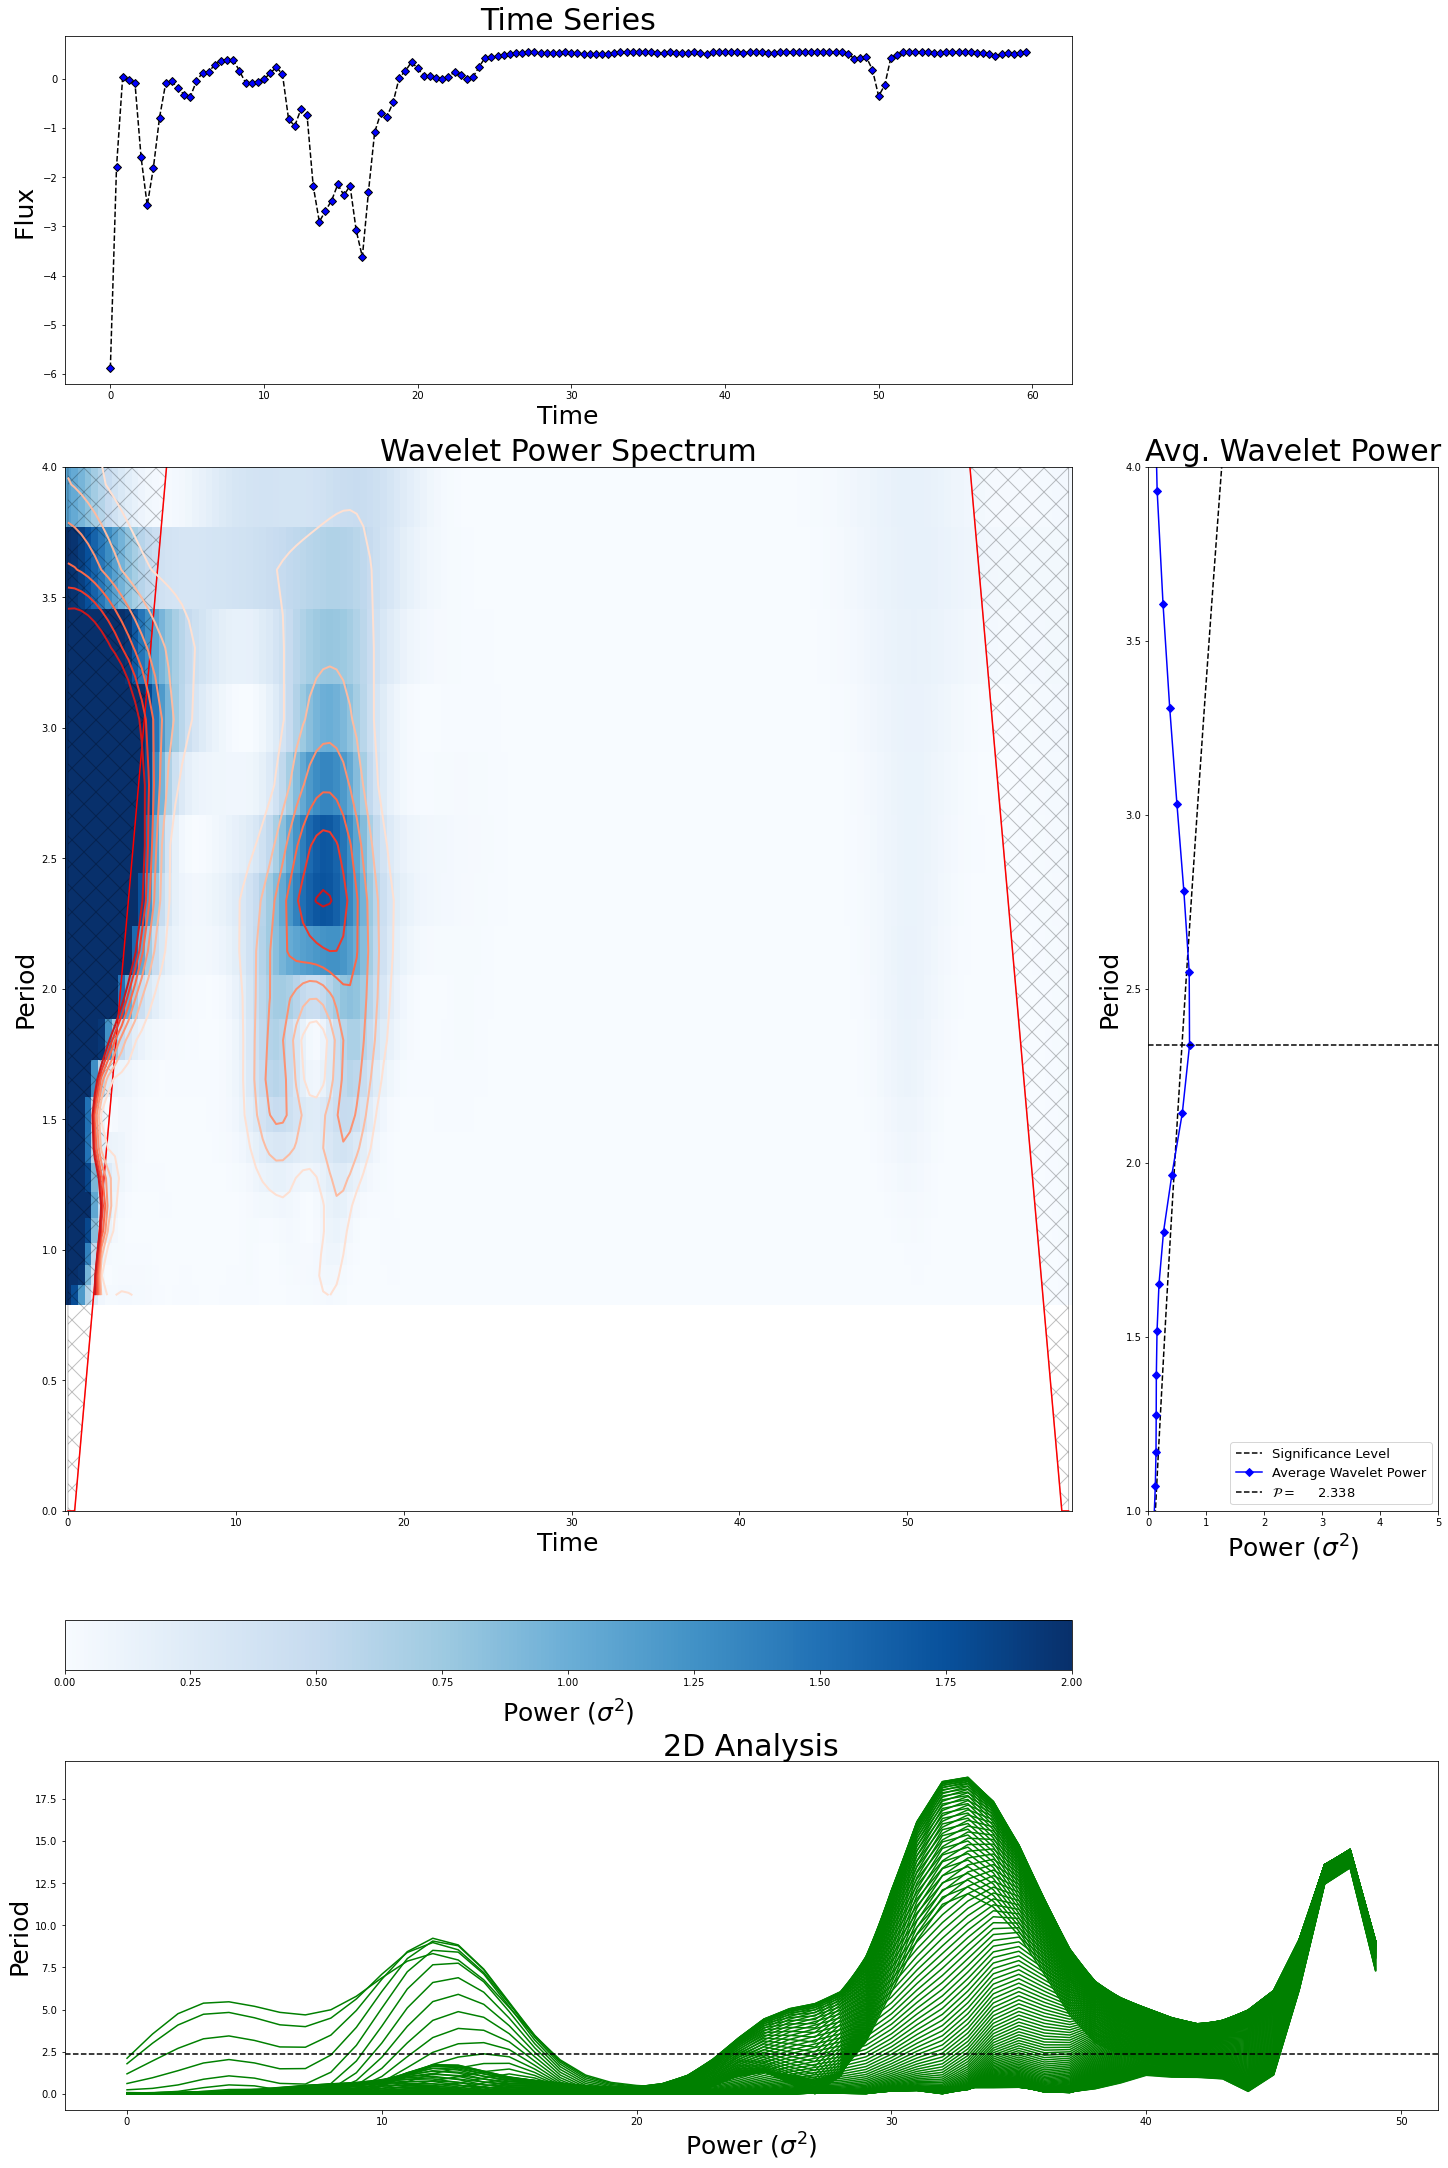

In [9]:
results = WaveletAnalysis2D(tmin, flux, save_path=None)

#### Quick Notes
